In [ ]:
## in this notebook, we will plot the results of running Sorcha
## on a sample of objects of varying nongravitational accelerations

## MEW, 11 Feb 2026

In [49]:
import os
import numpy as np
import pandas as pd
import pylab as plt
import glob

In [66]:
## open each file and count up the number of unique object IDs

fnames = []#'/home/ellie/research/lsst/sorcha_output/2000_obj/2000_obj_cart.csv']
fnames = fnames+glob.glob('/home/ellie/research/lsst/sorcha_output/2000_obj/2000_obj*30days.csv')

In [97]:
a1_counts = []
a1_nongrav = []

a2_counts = []
a2_nongrav = []

a3_counts = []
a3_nongrav = []

ofnames = []

for f in fnames: 
    df = pd.read_csv(f)

    if 'a1' in f:
        a1_counts.append(df['ObjID'].nunique())
        a1_nongrav.append(float(f.split('_')[-2]))#[:-4]))
        #print(df['fieldMJD_TAI'][0])
        ofname = f.split('/')[-1]
        ofname = ofname.split('.')[:-2]
        ofname = ofname[0]+'.0'
        print(ofname)
        ofnames.append(ofname)
    elif 'a2' in f:
        a2_counts.append(df['ObjID'].nunique())
        a2_nongrav.append(float(f.split('_')[-2]))#[:-4]))
        #print(df['fieldMJD_TAI'][0])
        ofname = f.split('/')[-1]
        ofname = ofname.split('.')[:-2]
        ofname = ofname[0]+'.0'
        print(ofname)
        ofnames.append(ofname)
    elif 'a3' in f:
        a3_counts.append(df['ObjID'].nunique())
        a3_nongrav.append(float(f.split('_')[-2]))#[:-4]))
        #print(df['fieldMJD_TAI'][0])
        ofname = f.split('/')[-1]
        ofname = ofname.split('.')[:-2]
        ofname = ofname[0]+'.0'
        print(ofname)
        ofnames.append(ofname)
    else:
        #print('saving gravity-only')
        grav_counts = df['ObjID'].nunique()
        ofname = f.split('/')[-1]
        ofname = ofname.split('.')[-2]
        ofname = ofname[:-7]
        print(ofname)
        ofnames.append(ofname)
        #print(df['fieldMJD_TAI'][0])

2000_obj_ng_a3_-6.0
2000_obj_ng_a3_-8.0
2000_obj_ng_a2_-11.0
2000_obj_ng_a3_-10.0
2000_obj_ng_a2_-10.0
2000_obj_ng_a2_-7.0
2000_obj_ng_a2_-8.0
2000_obj_ng_a1_-6.0
2000_obj_ng_a1_-8.0
2000_obj_cart
2000_obj_ng_a2_-9.0
2000_obj_ng_a2_-6.0
2000_obj_ng_a1_-9.0
2000_obj_ng_a3_-7.0
2000_obj_ng_a3_-9.0
2000_obj_ng_a1_-7.0
2000_obj_ng_a3_-12.0
2000_obj_ng_a3_-11.0
2000_obj_ng_a2_-12.0
2000_obj_ng_a1_-11.0
2000_obj_ng_a1_-12.0
2000_obj_ng_a1_-10.0


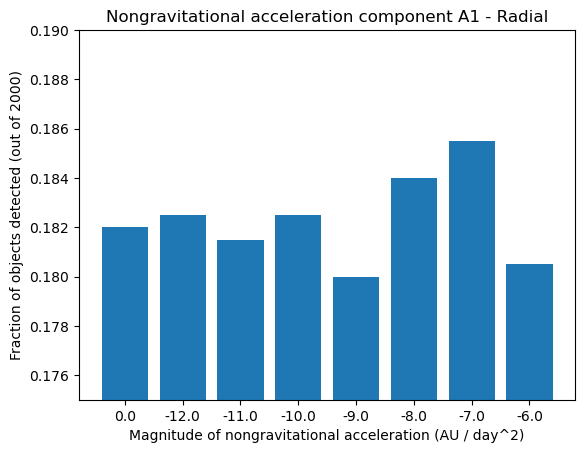

In [98]:
a1 = np.column_stack((np.array(a1_nongrav), np.array(a1_counts)))
sorted_idx = a1[:,0].argsort()
sorted_a1 = a1[sorted_idx]
sorted_a1 = np.concatenate((np.array([[0.0, grav_counts]]), sorted_a1))
plt.bar(sorted_a1[:,0].astype(str), sorted_a1[:,1]/2000)
#plt.ylim(1570,1600)
plt.ylim(0.175, 0.19)
plt.ylabel('Fraction of objects detected (out of 2000)')
plt.xlabel('Magnitude of nongravitational acceleration (AU / day^2)')
plt.title('Nongravitational acceleration component A1 - Radial')
plt.savefig('sorcha_hist_a1.png')
plt.show()

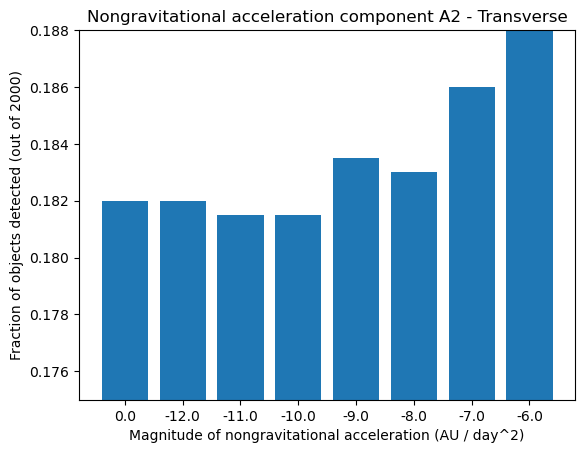

In [99]:
a2 = np.column_stack((np.array(a2_nongrav), np.array(a2_counts)))
sorted_idx = a2[:,0].argsort()
sorted_a2 = a2[sorted_idx]
sorted_a2 = np.concatenate((np.array([[0.0, grav_counts]]), sorted_a2))
plt.bar(sorted_a2[:,0].astype(str), sorted_a2[:,1]/2000)
#plt.ylim(1570,1600)
#plt.ylim(0.785,0.80)
plt.ylim(0.175, 0.188)
plt.ylabel('Fraction of objects detected (out of 2000)')
plt.xlabel('Magnitude of nongravitational acceleration (AU / day^2)')
plt.title('Nongravitational acceleration component A2 - Transverse')
plt.savefig('sorcha_hist_a2.png')
plt.show()

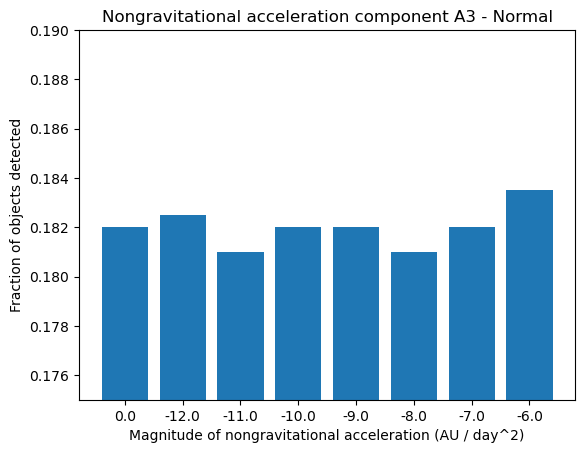

In [100]:
a3 = np.column_stack((np.array(a3_nongrav), np.array(a3_counts)))
sorted_idx = a3[:,0].argsort()
sorted_a3 = a3[sorted_idx]
sorted_a3 = np.concatenate((np.array([[0.0, grav_counts]]), sorted_a3))
plt.bar(sorted_a3[:,0].astype(str), sorted_a3[:,1]/2000)
#plt.ylim(1570,1600)
plt.ylim(0.785,0.80)
plt.ylim(0.175, 0.19)
plt.ylabel('Fraction of objects detected')
plt.xlabel('Magnitude of nongravitational acceleration (AU / day^2)')
plt.title('Nongravitational acceleration component A3 - Normal')
plt.savefig('sorcha_hist_a3.png')
plt.show()

In [101]:
## how many linkages?
sfpath = "/home/ellie/research/lsst/sorcha_output/2000_obj/"

links = []

for n in range(len(ofnames)):

    if os.path.isfile('{0}LPLsum_{1}.csv'.format(sfpath, ofnames[n])):
        df_links = pd.read_csv('{0}LPLsum_{1}.csv'.format(sfpath, ofnames[n]))
        num_links = len(df_links)

        print(ofnames[n]+' - '+str(num_links))
        #plt.scatter(df_links['orbit_a'], df_links['orbit_e'], marker='.')
        links.append(num_links)
    else:
        print('{0}LPLsum_{1}.csv does not exist'.format(sfpath, ofnames[n]))

#plt.show()


2000_obj_ng_a3_-6.0 - 335
2000_obj_ng_a3_-8.0 - 283
2000_obj_ng_a2_-11.0 - 283
2000_obj_ng_a3_-10.0 - 283
2000_obj_ng_a2_-10.0 - 283
2000_obj_ng_a2_-7.0 - 289
2000_obj_ng_a2_-8.0 - 285
2000_obj_ng_a1_-6.0 - 278
2000_obj_ng_a1_-8.0 - 287
2000_obj_cart - 282
2000_obj_ng_a2_-9.0 - 281
2000_obj_ng_a2_-6.0 - 307
2000_obj_ng_a1_-9.0 - 277
2000_obj_ng_a3_-7.0 - 290
2000_obj_ng_a3_-9.0 - 283
2000_obj_ng_a1_-7.0 - 286
2000_obj_ng_a3_-12.0 - 281
2000_obj_ng_a3_-11.0 - 281
2000_obj_ng_a2_-12.0 - 282
2000_obj_ng_a1_-11.0 - 280
2000_obj_ng_a1_-12.0 - 280
2000_obj_ng_a1_-10.0 - 280


In [113]:
a1_links = []
a1_ngas = []

a2_links = []
a2_ngas = []

a3_links = []
a3_ngas = []

for l in range(len(ofnames)): 

    if 'a1' in ofnames[l]:
        a1_links.append(links[l])
        #print(ofnames[l].split('_')[-1])
        a1_ngas.append(float(ofnames[l].split('_')[-1]))
        print('a1: '+ofnames[l])

    elif 'a2' in ofnames[l]:
        a2_links.append(links[l])
        #print(ofnames[l].split('_')[-1])
        a2_ngas.append(float(ofnames[l].split('_')[-1]))
        print('a2: '+ofnames[l])
        
    elif 'a3' in ofnames[l]:
        a3_links.append(links[l])
        #print(ofnames[l].split('_')[-1])
        a3_ngas.append(float(ofnames[l].split('_')[-1]))
        print('a3: '+ofnames[l])
        
    else:
        #print('saving gravity-only')
        grav_links = links[l]

a3: 2000_obj_ng_a3_-6.0
a3: 2000_obj_ng_a3_-8.0
a2: 2000_obj_ng_a2_-11.0
a3: 2000_obj_ng_a3_-10.0
a2: 2000_obj_ng_a2_-10.0
a2: 2000_obj_ng_a2_-7.0
a2: 2000_obj_ng_a2_-8.0
a1: 2000_obj_ng_a1_-6.0
a1: 2000_obj_ng_a1_-8.0
a2: 2000_obj_ng_a2_-9.0
a2: 2000_obj_ng_a2_-6.0
a1: 2000_obj_ng_a1_-9.0
a3: 2000_obj_ng_a3_-7.0
a3: 2000_obj_ng_a3_-9.0
a1: 2000_obj_ng_a1_-7.0
a3: 2000_obj_ng_a3_-12.0
a3: 2000_obj_ng_a3_-11.0
a2: 2000_obj_ng_a2_-12.0
a1: 2000_obj_ng_a1_-11.0
a1: 2000_obj_ng_a1_-12.0
a1: 2000_obj_ng_a1_-10.0


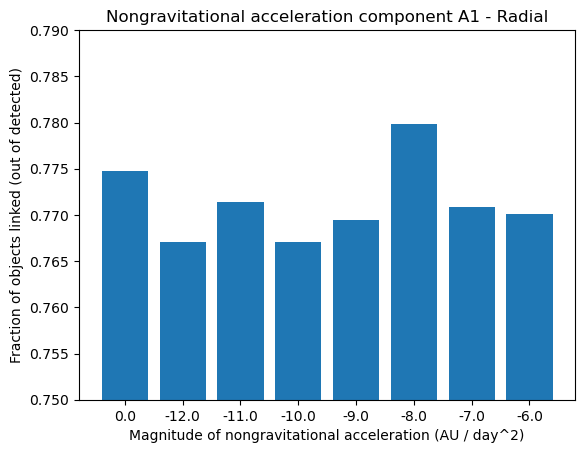

In [134]:
a1_l = np.column_stack((np.array(a1_ngas), np.array(a1_links)))
sorted_idx_l = a1_l[:,0].argsort()
sorted_a1_l = a1_l[sorted_idx_l]
sorted_a1_l = np.concatenate((np.array([[0.0, grav_links]]), sorted_a1_l))


a1_link_fraction = []
for k in range(len(sorted_a1_l)):
    a1_link_fraction.append(sorted_a1_l[:,1][k]/sorted_a1[:,1][k])

plt.bar(sorted_a1_l[:,0].astype(str), a1_link_fraction) #sorted_a1_l[:,1]/sorted_a1[:,1])
#plt.ylim(1570,1600)
plt.ylim(0.75, 0.79)
plt.ylabel('Fraction of objects linked (out of detected)')
plt.xlabel('Magnitude of nongravitational acceleration (AU / day^2)')
plt.title('Nongravitational acceleration component A1 - Radial')
plt.savefig('linkage_hist_a1.png')
plt.show()

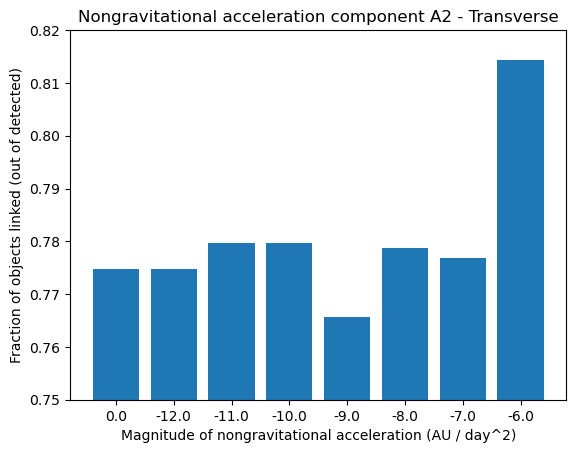

In [146]:
a2_l = np.column_stack((np.array(a2_ngas), np.array(a2_links)))
sorted_idx_l = a2_l[:,0].argsort()
sorted_a2_l = a2_l[sorted_idx_l]
sorted_a2_l = np.concatenate((np.array([[0.0, grav_links]]), sorted_a2_l))


a2_link_fraction = []
for m in range(len(sorted_a2_l)):
    a2_link_fraction.append(sorted_a2_l[:,1][m]/sorted_a2[:,1][m])

plt.bar(sorted_a2_l[:,0].astype(str), a2_link_fraction)
#plt.ylim(1570,1600)
plt.ylim(0.75, 0.82)
plt.ylabel('Fraction of objects linked (out of detected)')
plt.xlabel('Magnitude of nongravitational acceleration (AU / day^2)')
plt.title('Nongravitational acceleration component A2 - Transverse')
plt.savefig('linkage_hist_a2.png')
plt.show()

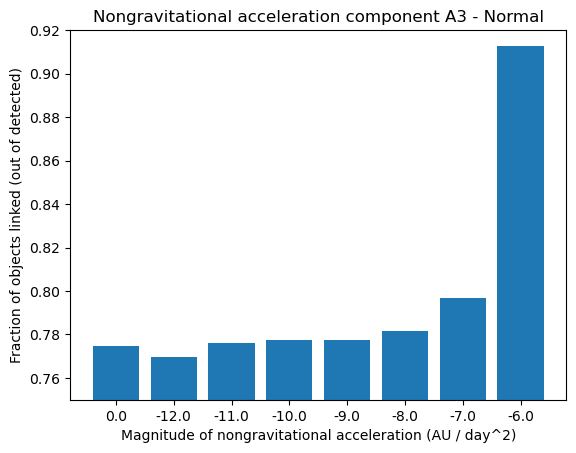

In [145]:
a3_l = np.column_stack((np.array(a3_ngas), np.array(a3_links)))
sorted_idx_l = a3_l[:,0].argsort()
sorted_a3_l = a3_l[sorted_idx_l]
sorted_a3_l = np.concatenate((np.array([[0.0, grav_links]]), sorted_a3_l))


a3_link_fraction = []
for m in range(len(sorted_a3_l)):
    a3_link_fraction.append(sorted_a3_l[:,1][m]/sorted_a3[:,1][m])

plt.bar(sorted_a3_l[:,0].astype(str), a3_link_fraction)
#plt.ylim(1570,1600)
plt.ylim(0.75, 0.92)
plt.ylabel('Fraction of objects linked (out of detected)')
plt.xlabel('Magnitude of nongravitational acceleration (AU / day^2)')
plt.title('Nongravitational acceleration component A3 - Normal')
plt.savefig('linkage_hist_a3.png')
plt.show()